In [1]:
import pandas as pd

df = pd.read_csv('Task2_data.csv')
df

,CustomerID,Name,Gender,Age,Annual Income (k$),Spending Score (1-100),Address,Occupation,City
0,1,Luis Jackson,Male,19,15,39,"7294 Scott Harbor Apt. 602\nNorth Tammytown, W...","Teacher, music",Brandonshire
1,2,Nicole Cruz,Male,21,15,81,"67557 Moody Roads\nLake Johnshire, PW 59047",Product manager,Ariasstad
2,3,Linda Brooks,Female,20,16,6,"090 Hancock Highway\nSouth Patriciaview, DC 65170",Sub,North Shaneville
3,4,Steven Morgan,Female,23,16,77,"6532 Amanda Mission Apt. 406\nHollyburgh, RI 9...",Administrator,Lake Rebecca
4,5,Kelly Evans,Female,31,17,40,"27141 Lawrence Plains\nGaryfurt, WV 94124",Occupational therapist,Adamsborough
...,...,...,...,...,...,...,...,...,...
5195,5196,David Garcia,Female,64,119,26,"90770 Cardenas Turnpike\nMillertown, NH 63540","Clinical scientist, histocompatibility and imm...",Annetteberg
5196,5197,Ryan Thompson,Male,47,122,30,"2654 Jimenez Ford\nChristinebury, SC 66676","Geologist, wellsite",Port Jeffrey
5197,5198,Alejandro Haas,Female,34,99,37,"PSC 2918, Box 0616\nAPO AP 06820",Systems developer,New Elaineshire
5198,5199,Kelly Maldonado,Male,54,97,69,"202 Joshua Locks Suite 047\nNew Heatherton, MH...",Energy manager,Ronaldtown


In [2]:
df.columns

Index(['CustomerID', 'Name', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Address', 'Occupation', 'City'],
      dtype='object')

# Q1
The features used in this dataset for customer segmentation are: CustomerID, Name, Gender, Age, Annual Income (k$), Spending Score (1-100), Address, Occupation, and City.

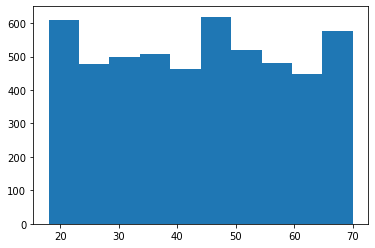

In [4]:
# Q2
import matplotlib.pyplot as plt

plt.hist(df['Age'])
plt.show()

In [5]:
# Q3
corr_matrix = df.corr(method='pearson')['Spending Score (1-100)']
print(corr_matrix)

CustomerID                0.017582
Age                      -0.019664
Annual Income (k$)        0.008992
Spending Score (1-100)    1.000000
Name: Spending Score (1-100), dtype: float64


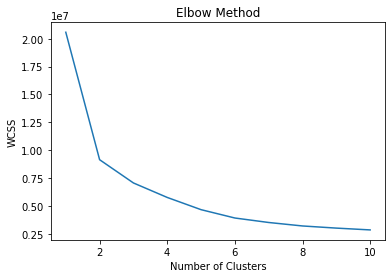

In [6]:
# Q4
from sklearn.cluster import KMeans

X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [7]:
# Q5
avg_income = df['Annual Income (k$)'].mean()
print(f"The average annual income of customers in the dataset is: {avg_income:.2f} k$")

The average annual income of customers in the dataset is: 105.17 k$


In [8]:
# Q6
male_customers = df[df['Gender'] == 'Male']
avg_spending_male = male_customers['Spending Score (1-100)'].mean()
print(f"The average spending score of male customers in the dataset is: {avg_spending_male:.2f}")

The average spending score of male customers in the dataset is: 50.44


In [ ]:
# Q7

import numpy as np
from sklearn.cluster import KMeans


X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

df['Cluster'] = y_kmeans
print(df['Cluster'].value_counts())

for i in range(5):
    print(f"Cluster {i}:\n{df[df['Cluster'] == i]}\n")

cluster_means = df.groupby('Cluster')['Annual Income (k$)', 'Spending Score (1-100)'].mean()
highest_income_score_cluster = cluster_means[(cluster_means['Annual Income (k$)'] == cluster_means['Annual Income (k$)'].max()) & (cluster_means['Spending Score (1-100)'] == cluster_means['Spending Score (1-100)'].max())].index[0]
print(f"The cluster with the highest average income and spending score is: Cluster {highest_income_score_cluster}")

In [ ]:
# Q8